In [2]:
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline        

# genome --k1--> template
# template --k2-->
# template --k3--> template + genome
# genome + struct --k4--> secreted
# template --k5--> template + struct
# struct --k6--> secreted/degraded

    
def deriv(stateTuple, t, k1, k2, k3, k4, k5, k6):
    
    template = stateTuple[0]
    genome = stateTuple[1]
    struct = stateTuple[2]
    
    dtemplatedt = -1.0 * (k2 * template + k3 * template + k5 * template) + \
        (k1 * genome + k3 * template + k5 * template)
    dgenomedt = -1.0 * (k1 * template + k4 * genome * struct) + \
        (k3 * template)
    dstructdt = -1.0 * (k4 * genome * struct + k6 * struct) + \
        (k5 * template)
    
    return(dtemplatedt, dgenomedt, dstructdt)

template = 1.0
genome = 0.0
struct = 0.0

k1 = 0.025
k2 = 0.25
k3 = 1.0
k4 = 7.5 * 10**-6
k5 = 1000.0
k6 = 1.99

odemax = 100.0
odemin = 0.0
buckets = 1000
step = (odemax - odemin)/buckets
t = list(np.arange(odemin, odemax, step))

ret = odeint(deriv, (template, genome, struct), t, args=(k1, k2, k3, k4, k5, k6))
print("Done")

Done


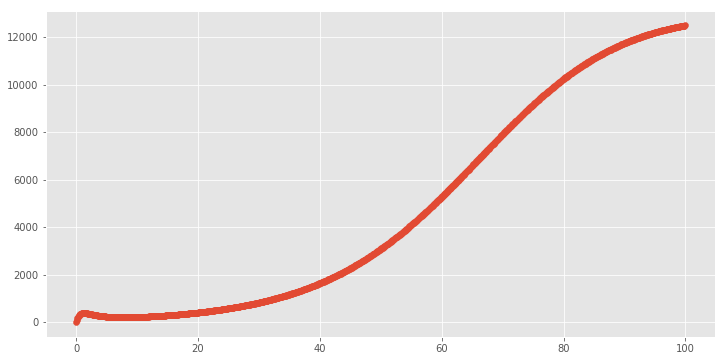

In [7]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t, ret.T[2])